In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
prodata = pd.read_csv('prodata_refined.csv')

#drop duplicates
#prodata.drop_duplicates()

#show sample
prodata.head()

,Team,Player,Game,Mouse,Mouse HZ,DPI,Sensitivity,eDPI,Monitor,Monitor HZ,GPU,Resolution,Aspect Ratio,Mousepad,Keyboard,Headset
0,Streamer,n0thing,Counter Strike: Global Offensive,Logitech G100s Custom,500,400,2.0,800,Alienware AW2521H,360.0,RTX 3090,1920x1080,16:9,SteelSeries QcK Heavy,HyperX Alloy Elite,Logitech G Pro X Wireless Headset SE
1,Streamer,shroud,Counter Strike: Global Offensive,Logitech G303 Shroud Edition,"1,000",450,2.4,"1,080",Alienware AW2721D,240.0,RTX 3090,2560x1440,16:9,Logitech G840 SE,Logitech G Pro X MK SE,Logitech G Pro X Wireless Headset SE
2,EG (S),Stewie2k,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000",400,2.0,800,BenQ XL2546K,360.0,RTX 2080 Super,1024x768,4:3,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II
3,Titans,MSL,Counter Strike: Global Offensive,Zowie EC2-B Divina Edition,"1,000",400,1.6,640,BenQ XL2546,240.0,GTX 1080 Ti,1280x960,4:3,SteelSeries QcK Heavy,SteelSeries APEX M750 TKL,SteelSeries Arctis Pro
4,Vitality,Magisk,Counter Strike: Global Offensive,Razer DeathAdder V3 Pro,"4,000",800,1.0,800,BenQ XL2546,240.0,RTX 3080,1680x1050,16:10,VAXEE PA Y22,Razer Huntsman V2 TKL,Corsair HS80


Aspect Ratio
14:9       1
16:10     40
16:9     226
4:3      352
5:4       22
Name: Game, dtype: int64
4:3      311
16:9      55
16:10     27
5:4       16
Name: Aspect Ratio, dtype: int64
16:9     171
4:3       41
16:10     13
5:4        6
14:9       1
Name: Aspect Ratio, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

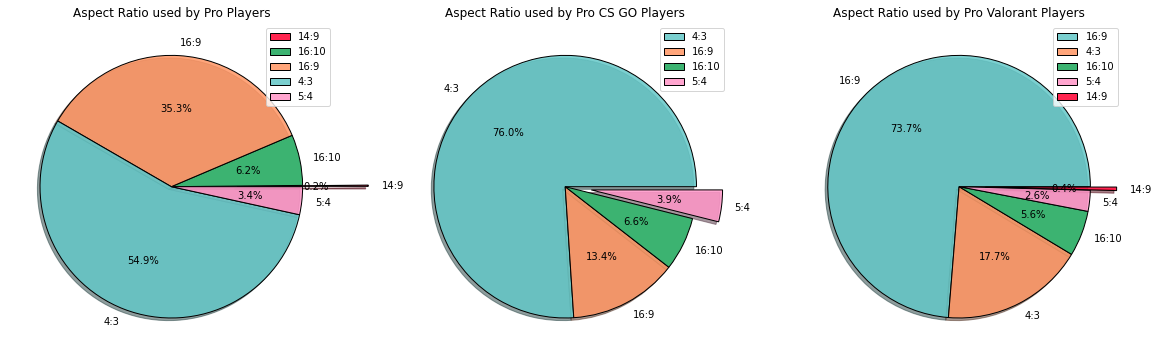

In [3]:
#Most popular aspect ratio used by pros
figs=plt.figure(figsize=(20,10)) #set size of overall figure
plt.subplot(1,3,1)

pros = prodata.groupby(by=prodata['Aspect Ratio'])
print(pros['Game'].count())

#colors
orang = '#ff9664d9'
blug = '#64c8c8d9'
mag='#ff96c8d9'
red = '#ff0032d9'
c = 'mediumseagreen'

labels = []
for i in pros['Aspect Ratio'].unique():
    for a in i:
        labels.append(a)

colors =[red,c,orang,blug,mag]
explode = [0.5,0,0,0,0]
labels

plt.title('Aspect Ratio used by Pro Players')
plt.pie(pros['Game'].count(),explode,labels=labels,colors=colors,shadow = True,autopct='%1.1f%%'
        ,wedgeprops={'edgecolor':'black'})

# fig = plt.gcf()
# fig.set_size_inches(8,10)
plt.legend(loc='best')


#drill down and look at data for cs pros only
plt.subplot(1,3,2)
cs = prodata[prodata['Game']== 'Counter Strike: Global Offensive']
print(cs['Aspect Ratio'].value_counts())


#colors
orang = '#ff9664d9'
blug = '#64c8c8d9'
mag='#ff96c8d9'
red = '#ff0032d9'
c = 'mediumseagreen'

labels = ['4:3','16:9','16:10','5:4']    
colors =[blug,orang,c,mag,red]
explode = [0,0,0,0.2]

plt.title('Aspect Ratio used by Pro CS GO Players')
plt.pie(cs['Aspect Ratio'].value_counts(),explode,labels=labels,colors=colors,shadow = True,autopct='%1.1f%%'
        ,wedgeprops={'edgecolor':'black'})

# fig = plt.gcf()
# fig.set_size_inches(8,10)
plt.legend(loc='best')


#drill down and look at data for VALORANT pros only
plt.subplot(1,3,3)
val = prodata[prodata['Game']== 'VALORANT']
print(val['Aspect Ratio'].value_counts())

#colors
orang = '#ff9664d9'
blug = '#64c8c8d9'
mag='#ff96c8d9'
red = '#ff0032d9'
c = 'mediumseagreen'

labels = ['16:9','4:3','16:10','5:4','14:9']    
colors =[blug,orang,c,mag,red]
explode = [0,0,0,0,0.2]

plt.title('Aspect Ratio used by Pro Valorant Players')
plt.pie(val['Aspect Ratio'].value_counts(),explode,labels=labels,colors=colors,shadow = True,autopct='%1.1f%%'
        ,wedgeprops={'edgecolor':'black'})

# fig = plt.gcf()
# fig.set_size_inches(8,10)
plt.legend(loc='best')

#save pie charts.
plt.savefig('PieCharts.pdf')
plt.show

240.0    589
360.0     38
144.0     13
165.0      1
Name: Monitor HZ, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


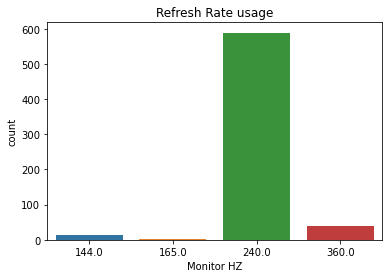

In [4]:
print(prodata['Monitor HZ'].value_counts())

#stretched vs. black bars and why?
sns.countplot(prodata['Monitor HZ'])
plt.title('Refresh Rate usage')
plt.show()

In [5]:
#A very interesting record
prodata[prodata['Player'] =='Stewie2k']

,Team,Player,Game,Mouse,Mouse HZ,DPI,Sensitivity,eDPI,Monitor,Monitor HZ,GPU,Resolution,Aspect Ratio,Mousepad,Keyboard,Headset
2,EG (S),Stewie2k,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000",400,2.00,800,BenQ XL2546K,360.0,RTX 2080 Super,1024x768,4:3,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II
423,EG (S),Stewie2k,VALORANT,Logitech G Pro X Superlight Black,"1,000",400,0.61,244,Alienware AW2521H,360.0,RTX 2080 Ti,1920x1080,16:9,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II
